In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
df = pd.read_csv(r'C:\Users\siavash\Documents\Projects\House price pred\melb_data.csv')
print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (13580, 21)
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             R

In [3]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [4]:
cols_to_drop = [
    "Suburb",
    "SellerG",
    "Postcode",
    "Address",
    "Date",
    "CouncilArea",
    "BuildingArea",
    "YearBuilt",
]

df = df.drop(cols_to_drop, axis=1)
print("shape:", df.shape)
print(df.head())

shape: (13580, 13)
   Rooms Type      Price Method  Distance  Bedroom2  Bathroom  Car  Landsize  \
0      2    h  1480000.0      S       2.5       2.0       1.0  1.0     202.0   
1      2    h  1035000.0      S       2.5       2.0       1.0  0.0     156.0   
2      3    h  1465000.0     SP       2.5       3.0       2.0  0.0     134.0   
3      3    h   850000.0     PI       2.5       3.0       2.0  1.0      94.0   
4      4    h  1600000.0     VB       2.5       3.0       1.0  2.0     120.0   

   Lattitude  Longtitude             Regionname  Propertycount  
0   -37.7996    144.9984  Northern Metropolitan         4019.0  
1   -37.8079    144.9934  Northern Metropolitan         4019.0  
2   -37.8093    144.9944  Northern Metropolitan         4019.0  
3   -37.7969    144.9969  Northern Metropolitan         4019.0  
4   -37.8072    144.9941  Northern Metropolitan         4019.0  


In [5]:
# Fill Car with the most frequent value
most_frequent_car = df["Car"].value_counts().index[0]
df["Car"].fillna(most_frequent_car, inplace=True)

print(df.isnull().sum())

Rooms            0
Type             0
Price            0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


C:\Users\siavash\AppData\Local\Temp\ipykernel_2584\3406259379.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Car"].fillna(most_frequent_car, inplace=True)


In [6]:
# Encode categorical variables
le_type = preprocessing.LabelEncoder()
le_method = preprocessing.LabelEncoder()
le_region = preprocessing.LabelEncoder()

df["Type"] = le_type.fit_transform(df["Type"])
df["Method"] = le_method.fit_transform(df["Method"])
df["Regionname"] = le_region.fit_transform(df["Regionname"])

print(df.head())

   Rooms  Type      Price  Method  Distance  Bedroom2  Bathroom  Car  \
0      2     0  1480000.0       1       2.5       2.0       1.0  1.0   
1      2     0  1035000.0       1       2.5       2.0       1.0  0.0   
2      3     0  1465000.0       3       2.5       3.0       2.0  0.0   
3      3     0   850000.0       0       2.5       3.0       2.0  1.0   
4      4     0  1600000.0       4       2.5       3.0       1.0  2.0   

   Landsize  Lattitude  Longtitude  Regionname  Propertycount  
0     202.0   -37.7996    144.9984           2         4019.0  
1     156.0   -37.8079    144.9934           2         4019.0  
2     134.0   -37.8093    144.9944           2         4019.0  
3      94.0   -37.7969    144.9969           2         4019.0  
4     120.0   -37.8072    144.9941           2         4019.0  


In [7]:
# define features and target
feature_cols = [
    "Rooms",
    "Type",
    "Method",     
    "Distance",
    "Bedroom2",
    "Bathroom",
    "Car",
    "Landsize",
    "Lattitude",
    "Longtitude",
    "Regionname",
    "Propertycount",
]

X = df[feature_cols]
y = df["Price"]

print(X.shape)
print(y.shape)

(13580, 12)
(13580,)


In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)  # trees can work on unscaled features
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nRandom Forest:")
print("R2:", r2_rf)
print("RMSE:", rmse_rf)

cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
print("CV R2 scores (RF):", cv_scores_rf)
print("CV R2 mean (RF):", cv_scores_rf.mean())



Random Forest:
R2: 0.8235303088562068
RMSE: 264756.88119904115
CV R2 scores (RF): [0.73911051 0.7863526  0.77056665 0.81144011 0.79434786]
CV R2 mean (RF): 0.7803635454976934


In [12]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("\nRidge Regression (alpha=1.0):")
print("R2:", r2_ridge)
print("RMSE:", rmse_ridge)

cv_scores_ridge = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring="r2")
print("CV R2 scores (Ridge):", cv_scores_ridge)
print("CV R2 mean (Ridge):", cv_scores_ridge.mean())



Ridge Regression (alpha=1.0):
R2: 0.5189776492237774
RMSE: 437114.1061965687
CV R2 scores (Ridge): [0.51860077 0.58464886 0.52901046 0.56396815 0.54999229]
CV R2 mean (Ridge): 0.5492441045412979


In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("\nLasso Regression (alpha=0.1):")
print("R2:", r2_lasso)
print("RMSE:", rmse_lasso)

cv_scores_lasso = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring="r2")
print("CV R2 scores (Lasso):", cv_scores_lasso)
print("CV R2 mean (Lasso):", cv_scores_lasso.mean())



Lasso Regression (alpha=0.1):
R2: 0.5189522470696044
RMSE: 437125.64775312075
CV R2 scores (Lasso): [0.5185991  0.58464384 0.52901364 0.5639575  0.55000256]
CV R2 mean (Lasso): 0.5492433281846516


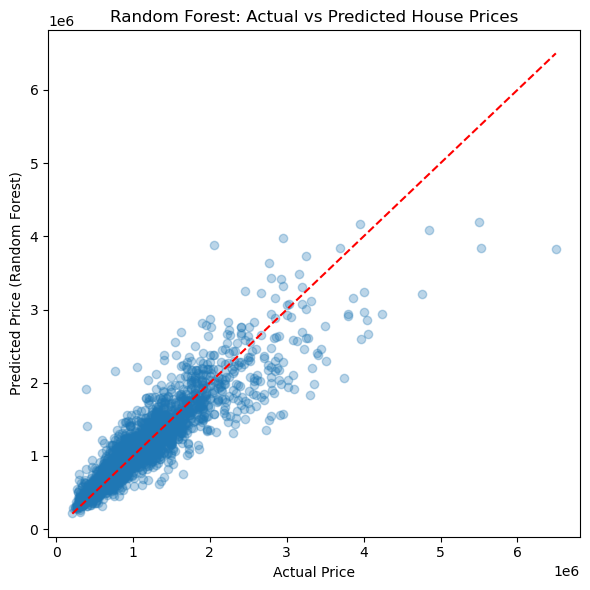

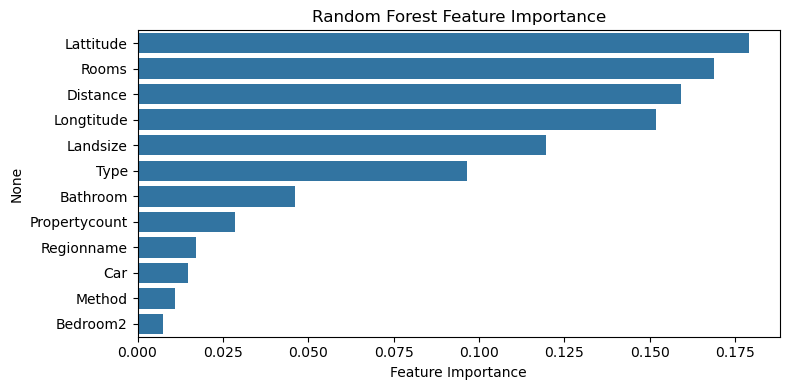

In [14]:
# Actual vs Predicted (Random Forest)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Random Forest)")
plt.title("Random Forest: Actual vs Predicted House Prices")

min_val = min(y_test.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

plt.tight_layout()
plt.show()

# Feature importance (Random Forest)
importances = rf.feature_importances_
feat_names = X.columns
fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=fi.values, y=fi.index)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


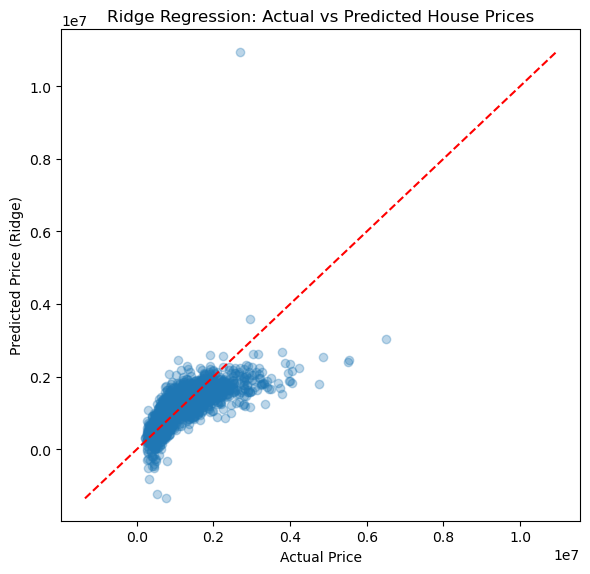

In [15]:
# Actual vs Predicted (Ridge regression)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Ridge)")
plt.title("Ridge Regression: Actual vs Predicted House Prices")
min_val = min(y_test.min(), y_pred_ridge.min())
max_val = max(y_test.max(), y_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

plt.tight_layout()
plt.show()


In [16]:
print("Ridge:",
      "R2 =",  r2_score(y_test, y_pred_ridge),
      "RMSE =", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

print("Lasso:",
      "R2 =",  r2_score(y_test, y_pred_lasso),
      "RMSE =", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

print("Random Forest:",
      "R2 =",  r2_score(y_test, y_pred_rf),
      "RMSE =", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear: R2 = 0.5189517469238394 RMSE = 437125.87499301875
Ridge: R2 = 0.5189776492237774 RMSE = 437114.1061965687
Lasso: R2 = 0.5189522470696044 RMSE = 437125.64775312075
Random Forest: R2 = 0.8235303088562068 RMSE = 264756.88119904115


In [17]:
# predict price for a hypothetical house with Random Forest

# Define a dict in the same format as your feature columns
example = {
    "Rooms": 3,
    "Type": "h",         
    "Method": "S",
    "Distance": 8.0,
    "Bedroom2": 3.0,
    "Bathroom": 2.0,
    "Car": 2.0,
    "Landsize": 300.0,
    "Lattitude": -37.8,
    "Longtitude": 144.9,
    "Regionname": "Northern Metropolitan",
    "Propertycount": 4000.0,
}

# Convert to DataFrame
example_df = pd.DataFrame([example])

# Apply the same label encoders as used for training
example_df["Type"] = le_type.transform(example_df["Type"])
example_df["Method"] = le_method.transform(example_df["Method"])
example_df["Regionname"] = le_region.transform(example_df["Regionname"])

# Select columns in the same order as X
example_X = example_df[X.columns]

# Predict with Random Forest (no scaling needed for RF here)
pred_price = rf.predict(example_X)[0]
print(f"Predicted price for the example house: {pred_price}")


Predicted price for the example house: 1181282.0
